# Name: Claudia Nikel

As I am new to neural networks I picked an images dataset that could be used to create a CNN similar to I did in a previous lab

## The CIFAR-10 dataset
The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class (from https://www.cs.toronto.edu/~kriz/cifar.html). There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. The class labels and their standard associated integer values are listed below.
- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

### 1. Import packages/modules

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

### 2. Import the dataset from Keras package 

In [2]:
(train_images, train_labels), (test_images, test_labels)= cifar10.load_data()

### 3. Plot some of the images 

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


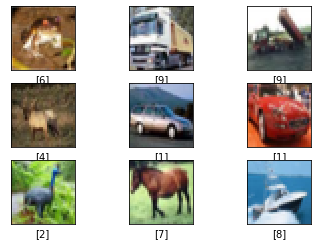

In [3]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

### One-hot encoding

The hardest part of this project was actually getting the data into the correct format for the neural network. We learned that many machine learning algorithms can't operate directly on categorical data directly and require all input variables to be numeric. For this dataset the labels, which are categorical, need to be switched to numeric form. For these labels we used a one-hot encoding, where a new binary variable replaces the integer encoded variable for each unique integer value. 
(https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

In [4]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

### 4. Prepare the picture data 
Each image is made up of pixels in the range from 0 to 255 and they need to be scaled in order to be used in the CNN model. After doing some research online, it is a good idea to normalize the pixel data so they have a value between 0 and 1. This is because large inputs can disrupt or slow down the learning process. To normalize the pixels, you need to divide them by the largest pixel value (i.e. 255). The pixels are also converted to the float data type

In [5]:
# convert from integers to floats
train_normalized=train_images.astype('float32')
test_normalized=test_images.astype('float32')
# normalize to range 0-1
train_normalized=train_normalized/255.0
test_normalized=test_normalized/255.0

### 5. Define the model
Each layer uses the ReLU activation function and the He initilization which are optimal to use. The CNN has a 3-block VGG model which is a good starting point to use (https://arxiv.org/abs/1409.1556). We were able to find many resources online about building VGG models and good starting points. Generally a learning rate of 0.001 and a large momentum of 0.9 is good.

In [6]:
def build_fc_model():
    fc_model=Sequential()
    #First VGG Block
    fc_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    fc_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    fc_model.add(MaxPooling2D((2, 2)))
    #Second VGG Block
    fc_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    fc_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    fc_model.add(MaxPooling2D((2, 2)))
    #Third VGG Block
    fc_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    fc_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    fc_model.add(MaxPooling2D((2, 2)))
    #Define a Flatten layer
    fc_model.add(Flatten())
    #Define the activation function for the first fully connected (Dense) layer
    fc_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    #Define the second Dense layer to output the classification probabilities
    fc_model.add(Dense(10, activation='softmax'))
    #10 nodes for the 10 classes
    #softmax=function that normalizes our values to a standard range (0 to 1)
    return fc_model

model=build_fc_model()

### 6. Compile the model

In [7]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### 7. Train the model

In [8]:
BATCH_SIZE=64
EPOCHS=40
trained_model=model.fit(train_normalized, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(test_normalized, test_labels), verbose=0)

In [9]:
trained_model.history

{'val_loss': [1.5071010984420776,
  1.2967187349319458,
  1.2064158058166503,
  1.076660175514221,
  1.0282138958930969,
  1.049152336883545,
  0.9734422574996948,
  1.0146131706237793,
  0.9264654615402221,
  0.9044828985214234,
  0.9142084038734436,
  0.9408901608467102,
  0.9450634894371033,
  0.9451826473236083,
  1.0504633752822876,
  1.1461503400802613,
  1.1338293529510497,
  1.160650235748291,
  1.269395637321472,
  1.2936937854766846,
  1.4134940294265748,
  1.4281180461883545,
  1.5377424379348754,
  1.657490390777588,
  1.7752749099731446,
  1.779658278274536,
  1.89836962890625,
  1.9300825771331787,
  2.0796964488983156,
  1.9409466007232665,
  2.0366564420700075,
  2.1894261409759523,
  2.0338920463562014,
  2.2246124702453614,
  2.293518137741089,
  2.257415628814697,
  2.3157348987579347,
  2.3354961334228515,
  2.217507133102417,
  2.353929195404053],
 'val_accuracy': [0.4564000070095062,
  0.5317000150680542,
  0.5676000118255615,
  0.6216999888420105,
  0.63830000162

### 8. Evaluate accuracy on test dataset

In [10]:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 422us/step
Test accuracy: 0.6272000074386597


### 9. Plot the accuracy 
In general, models improve with more epochs of training, but only to a point and then they will start to plateau in accuracy as they converge. Originally I tried using 100 epochs but it wouldn't run on my computer. I decided to slowly increase the number of epochs and was able to run the model with 40 epochs. The red line represents the model's performance on the training dataset and the blue line represents the models performance on the test dataset. The accuracy on the test data is around 62%.

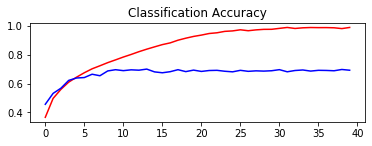

In [12]:
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(trained_model.history['accuracy'], color='red', label='train')
plt.plot(trained_model.history['val_accuracy'], color='blue', label='test')

### 9. Plot the loss 
You can see from this graph that the model overfits the test data because the models performance on the training data (red line) decreases (so it improves) whereas on the test data (blue line) improves slightly but then increases (gets worse) around 10 epochs. 

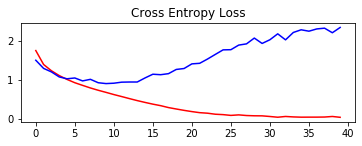

In [17]:
# plot loss
plt.subplot(212)
plt.title('Cross Entropy Loss')
plt.plot(trained_model.history['loss'], color='red', label='train')
plt.plot(trained_model.history['val_loss'], color='blue', label='test')

### 9. Conclusion

Because the images are of very low resolution that could be a cause for the misclassification and lower accuracy. As well using a higher number of epochs, say 100, would definitely give an improved result. The model was able to learn the training data, which is a good sign. To improve the results of the model on the test data, you could add more VGG blocks. However, increasing the number of epochs (the number of complete passes through the training dataset) and the number of VGG blocks requires more computer power and time. This model also shows overfitting at around 10-15 epochs. 

Resources: <br/>
[1]https://www.cs.toronto.edu/~kriz/cifar.html <br/>
[2]https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/ <br/>
[3]https://arxiv.org/abs/1409.1556 <br/>
[4]https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
[5]